In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
def seir_model(initial, param, time):
    S0, E0, I0, R0 = initial 
    S, E, I, R = [S0], [E0], [I0], [R0]
    alpha, beta, gamma = param
    dt = time[1]-time[0]
    for i in time[1:]:
        S_next = S[-1] - (beta*S[-1]*I[-1])*dt
        E_next = E[-1] + (beta*S[-1]*I[-1] - alpha*E[-1])*dt
        I_next = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        R_next = R[-1] + (gamma*I[-1])*dt
        S.append(S_next)
        E.append(E_next)
        I.append(I_next)
        R.append(R_next)
    return np.stack([S, E, I, R]).T

In [18]:
N = 10000
initial_values = [1 - 1/N, 1/N, 0, 0]
params = [0.2, 2.8, 0.8]
tspan = 90
dt = 0.1
t = np.linspace(0, tspan, int(tspan) + 1)
result = seir_model(initial_values, params,t)

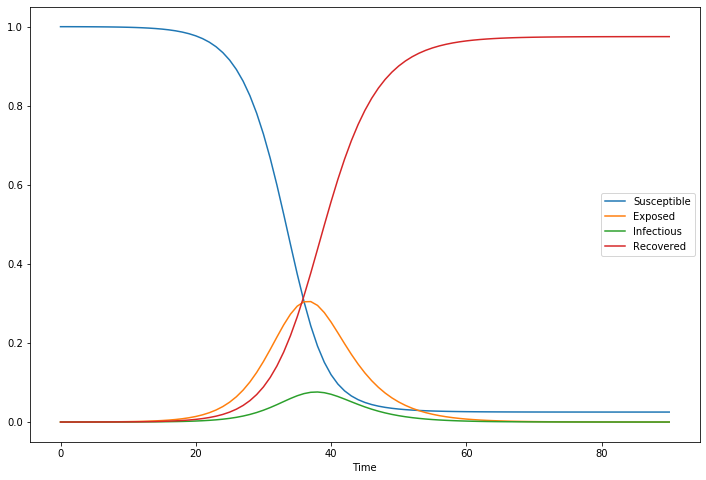

In [19]:
plt.figure(figsize=(12,8))
plt.plot(result)
plt.legend(['Susceptible', 'Exposed','Infectious', 'Recovered'])
plt.xlabel('Time')
plt.show()